# Results
## Agent: DQN  
## Environment: CartPole-v1 
### Comparision between 2 layer and 3 layer networks (each layer with 20 nodes)
#### Main Results: 3 layer network seems to perform slightly worse than 2 layer, suggesting overfitting.

## Plotting performance as a function of training time. 
Each graph represents a single training session starting from a fresh agent, with randomized weights.


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

def plotData(fileName,chartName, runNumber = -1):
    finalOutput = np.load(fileName)
    
    colors = (0, 0, 0)
    area = np.pi * 3
    
    if runNumber == -1:
        for i in range(len(finalOutput)):
            data = finalOutput[i]
            plt.figure(i)
            plt.plot(data[:,0], data[:,1])#, s=area, c=colors, alpha=0.5)
            plt.title(chartName)
            plt.xlabel('Nr of training epochs')
            plt.ylabel('Average Score over 100 runs')
            plt.show()

    else:
        data = finalOutput[runNumber]
        plt.figure(runNumber)
        plt.plot(data[:,0], data[:,1])#, s=area, c=colors, alpha=0.5)
        plt.title(chartName)
        plt.xlabel('Nr of training epochs')
        plt.ylabel('Average Score over 100 runs')
        plt.show()
        


### Agent: DQN, 2 layers with 20 nodes each

<IPython.core.display.Javascript object>


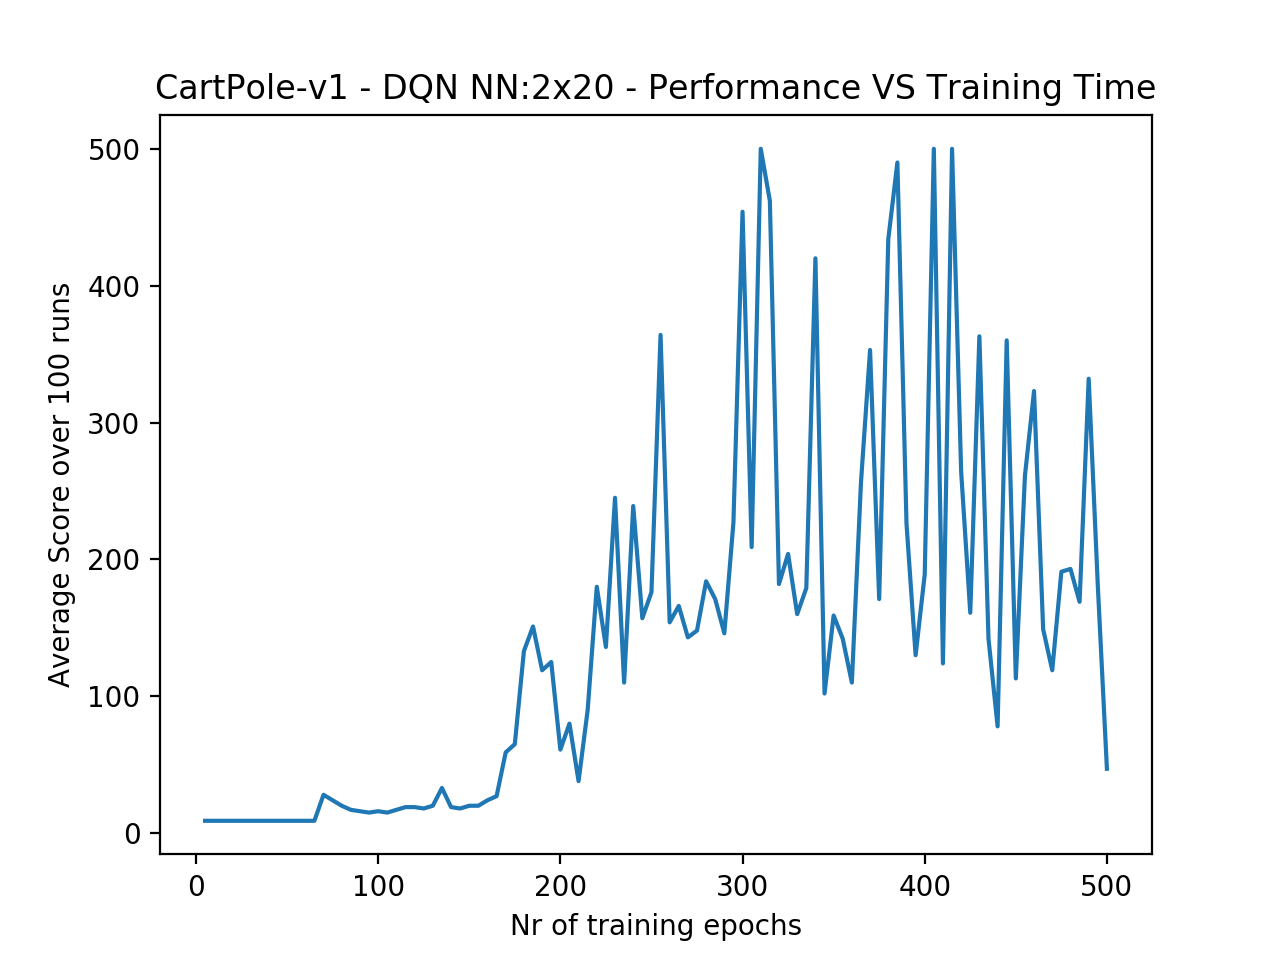

In [3]:
fileName = '/Users/frimann/Dropbox/2018_Haust_Tölvunarfræði_HR/Reinforcement learning leskúrs/RL-Alcomp/measurements/CartPole-v1/2_DQN_2x20/CartPole_DQA_2x20_1to4stacked_finalResults.npy'
chartName = 'CartPole-v1 - DQN NN:2x20 - Performance VS Training Time'
plotData(fileName, chartName, 1)

### Agent: DQN, 3 layers with 20 nodes each

<IPython.core.display.Javascript object>


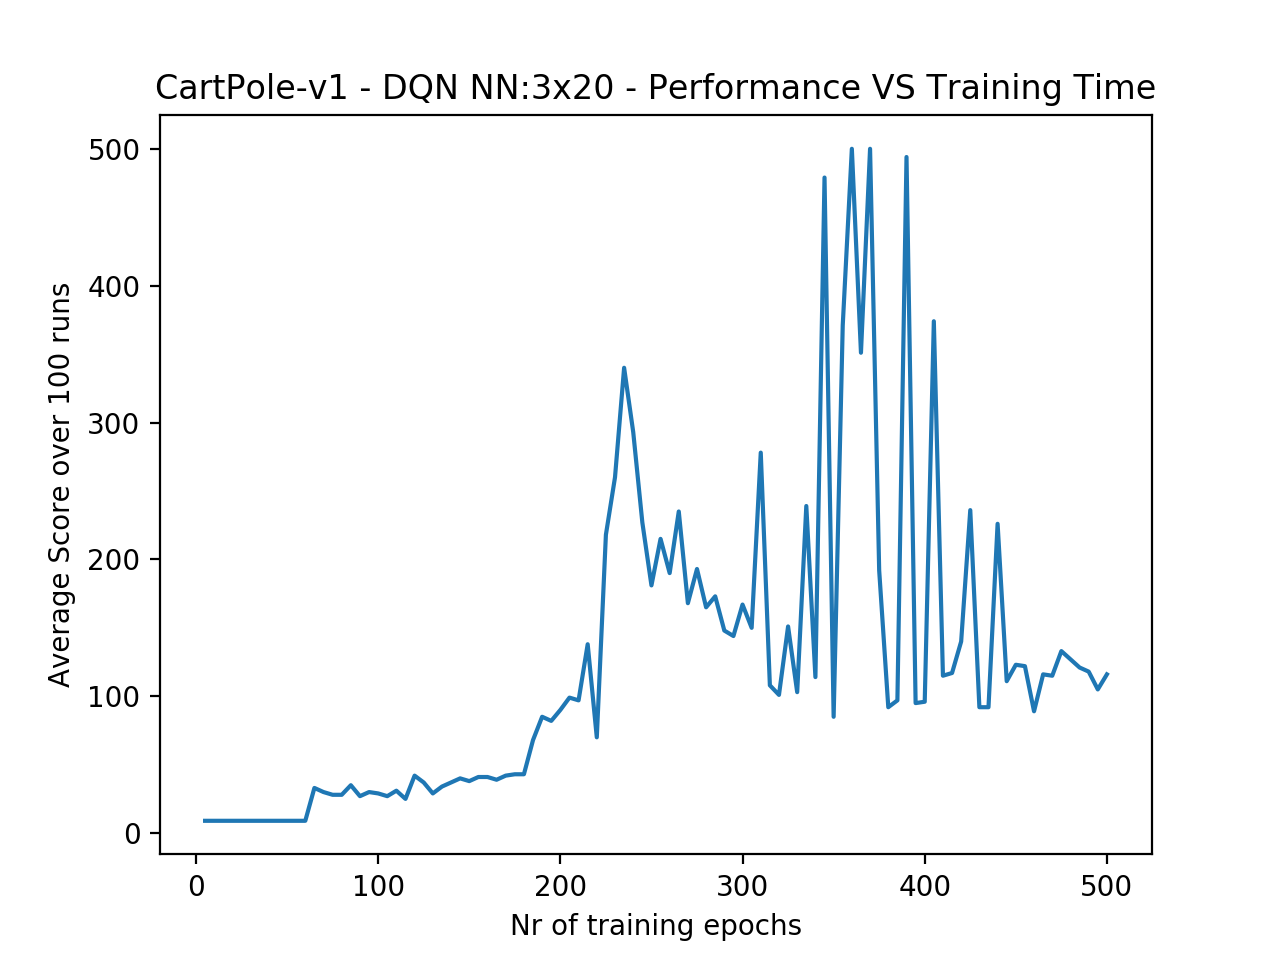

In [4]:
fileName = '/Users/frimann/Dropbox/2018_Haust_Tölvunarfræði_HR/Reinforcement learning leskúrs/RL-Alcomp/measurements/CartPole-v1/3_DQN_3x20/CartPole_DQA_3x20_1to2stacked_finalResults.npy'
chartName = 'CartPole-v1 - DQN NN:3x20 - Performance VS Training Time'
plotData(fileName, chartName,9)


## Plotting training time (number of epochs) needed to solve environment.
CartPole is considered to be solved if the agent scores 195 on average over 100 consecutive runs

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

solveLimit = 195
def getSolveDistances(fileName):#, chartName = "Default Name", runNumber = -1):
    finalOutput = np.load(fileName)
    
    l = len(finalOutput)
    m = len(finalOutput[0])
    x = np.zeros(l)
    
    for i in range(l):
        for j in range(m):
            if finalOutput[i][j][1] > solveLimit:
                x[i] = finalOutput[i][j][0]
                break
    return x

def plotSolveDistance(data, chartName, plotNr):
#     plt.figure(i)
    x = [i for i in range(len(data))]
    plt.figure(plotNr)
    plt.scatter(x,data)
    plt.title(chartName)
    plt.xlabel('Evaluation instance')
    plt.ylabel('Solve distance')
    plt.show()
    





### Agent: DQN, 2 layers with 20 nodes each

<IPython.core.display.Javascript object>


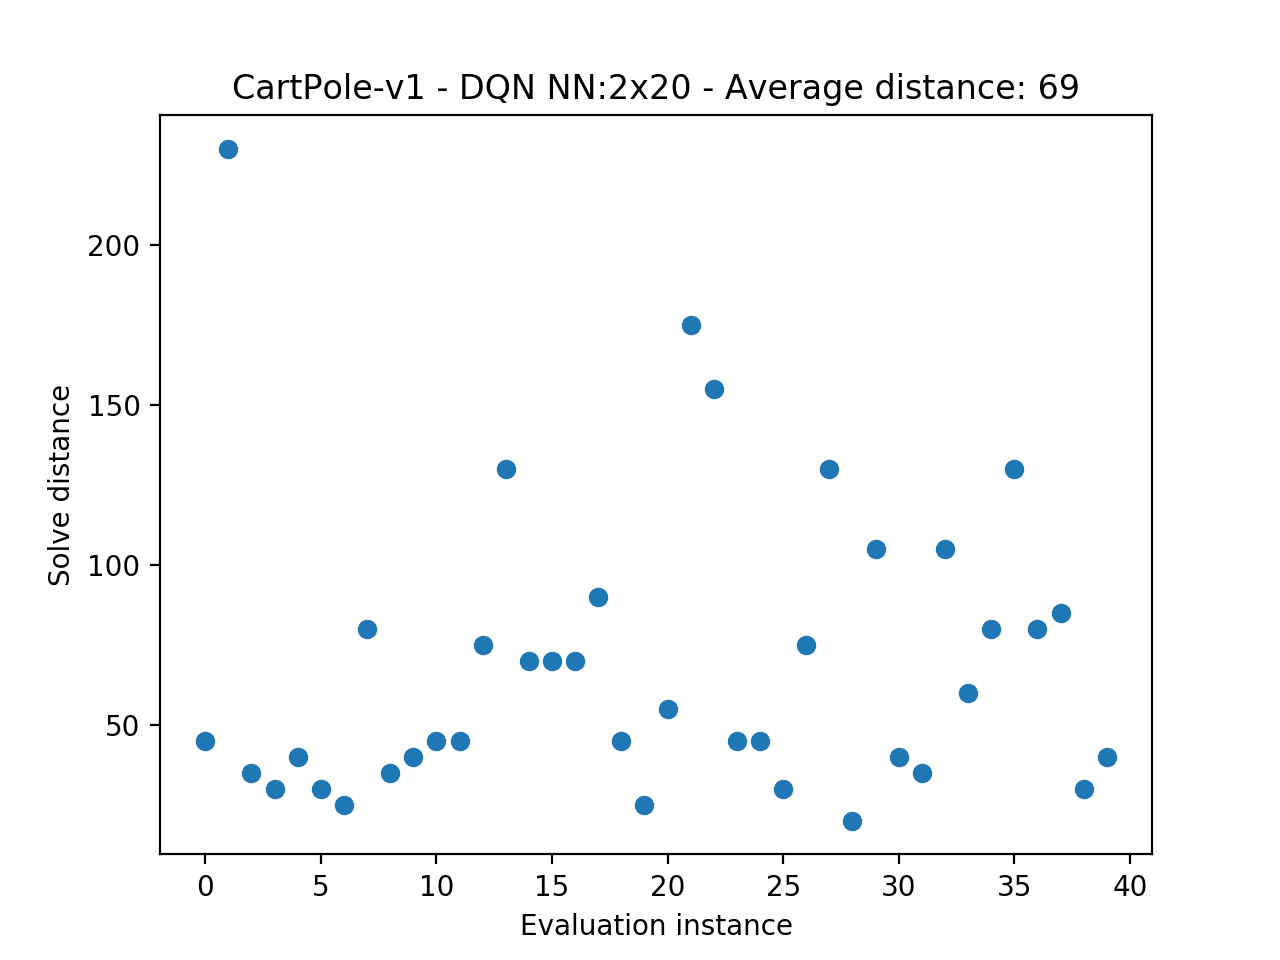

Average solve distance: 69


In [6]:
fileName = '/Users/frimann/Dropbox/2018_Haust_Tölvunarfræði_HR/Reinforcement learning leskúrs/RL-Alcomp/measurements/CartPole-v1/2_DQN_2x20/CartPole_DQA_2x20_1to4stacked_finalResults.npy'
chartName = 'CartPole-v1 - DQN NN:2x20'
solveDistances = getSolveDistances(fileName)
av = int(np.average(solveDistances))
chartName += " - Average distance: " + str(av) 
plotSolveDistance(solveDistances, chartName, 0)
print("Average solve distance: " + str(av))

### Agent: DQN, 3 layers with 20 nodes each

<IPython.core.display.Javascript object>


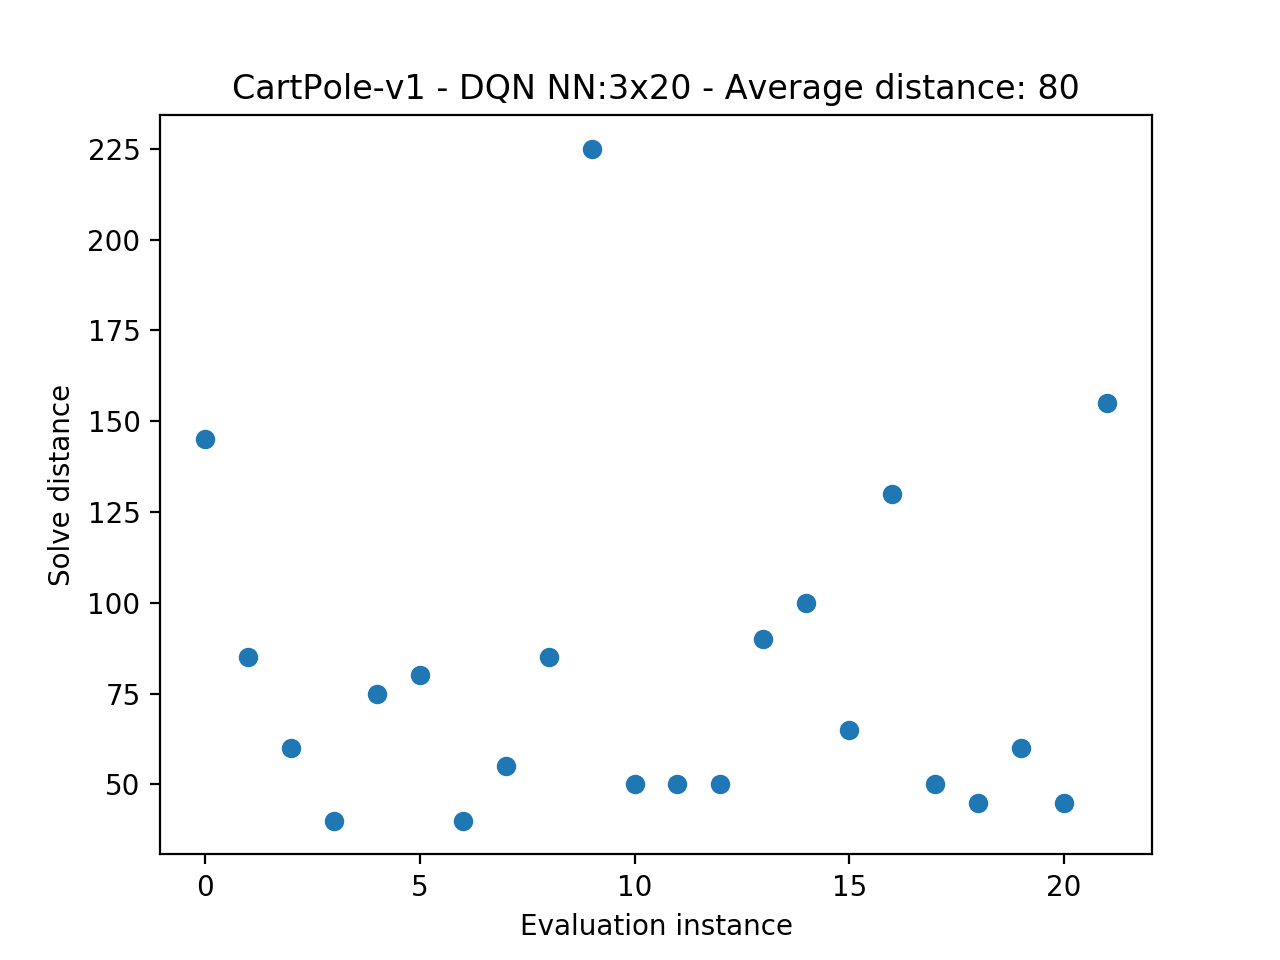

Average solve distance: 80


In [7]:
fileName = '/Users/frimann/Dropbox/2018_Haust_Tölvunarfræði_HR/Reinforcement learning leskúrs/RL-Alcomp/measurements/CartPole-v1/3_DQN_3x20/CartPole_DQA_3x20_1to2stacked_finalResults.npy'
chartName = 'CartPole-v1 - DQN NN:3x20'
solveDistances = getSolveDistances(fileName)
av = int(np.average(solveDistances))
chartName += " - Average distance: " + str(av) 
plotSolveDistance(solveDistances, chartName, 1)
print("Average solve distance: " + str(av))

## Generic Q-learning Agent taking regression model as input

Below we will show the best results from 3 selected regression models that were used to approximate the action-value function when using Q-learning.

### Gradient Boosted Decision Trees

This one uses a GBDT model as an action-value function. It performs exceptionally well

/Users/batman/school/hr/Reinforcement/RL-Alcomp


<IPython.core.display.Javascript object>


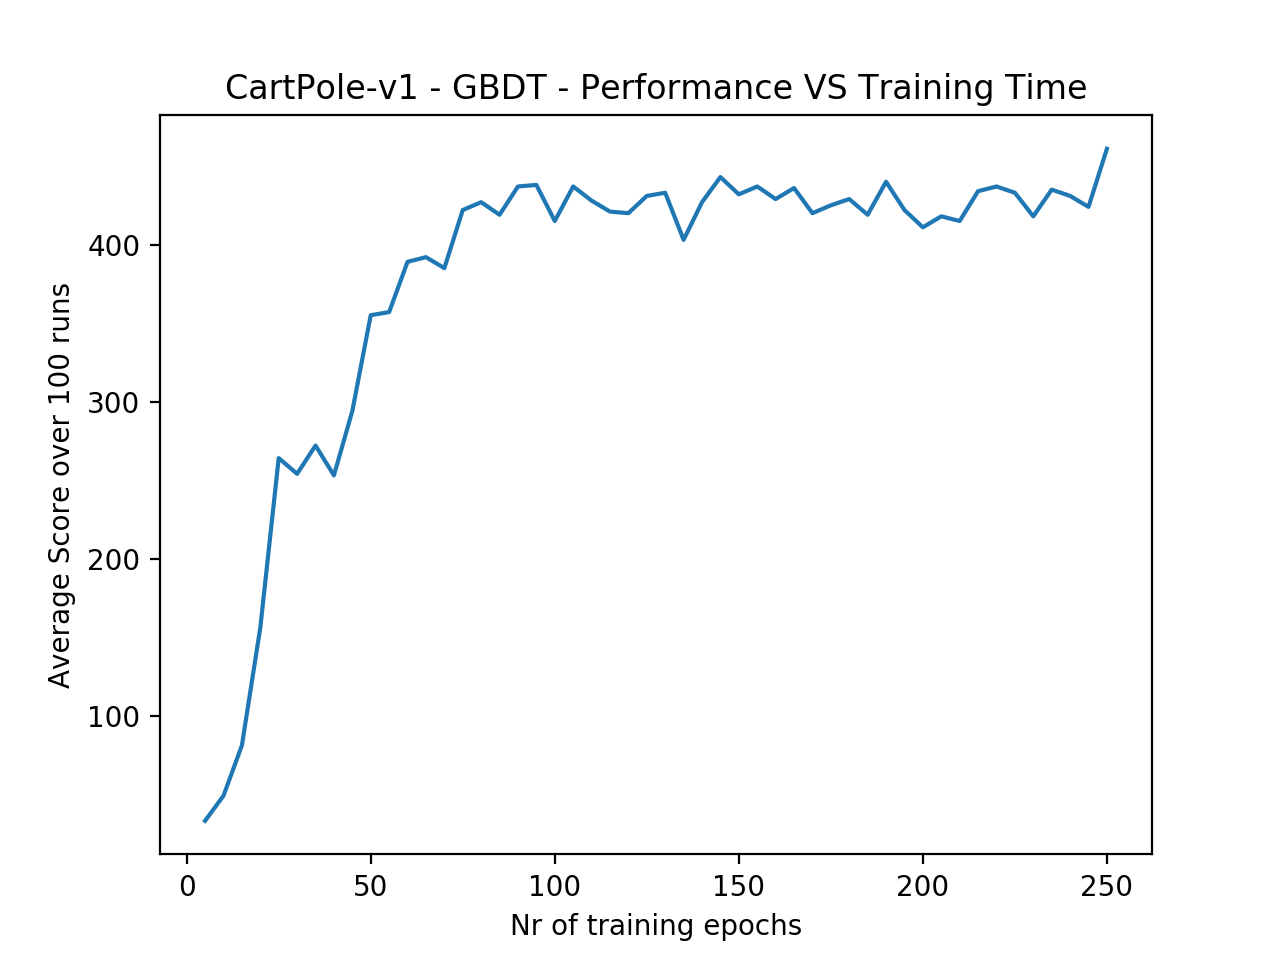

In [9]:
import os

cwd = os.getcwd()

print(cwd)

fileName = f'{cwd}/data/CartPole-v1/GBDTA_100/CartPole_GBDTA_100_-f_eval-8_finalEvationReturn.npy'
fileName = cwd + '/boostedTrees_final.npy'
chartName = 'CartPole-v1 - GBDT - Performance VS Training Time'
plotData(fileName, chartName, 8)

### Linear regression

This one uses linear regression as function approximation. It seems like it sometimes gets lucky and finds a relatively good strategy, but even then it clearly underperforms compared to the previously shown models.

/Users/batman/school/hr/Reinforcement/RL-Alcomp


<IPython.core.display.Javascript object>


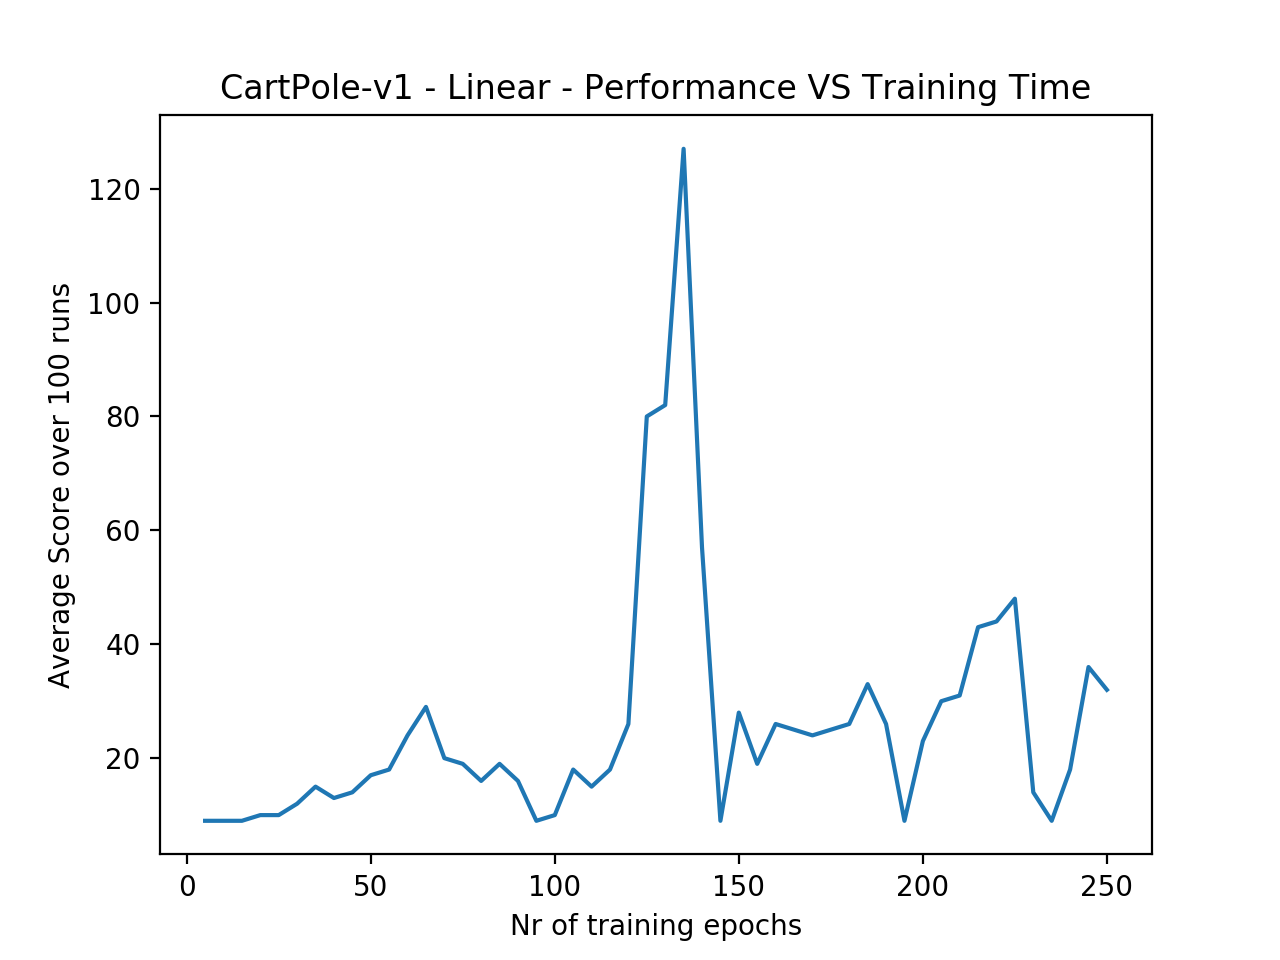

In [17]:
print(cwd)

fileName = cwd + '/data/CartPole-v1/Linear/1546390505803_finalResults.npy'
chartName = 'CartPole-v1 - Linear - Performance VS Training Time'

finalOutput = np.load(fileName)

best = -1
bestMax = -1
for i in range(10):
    data = finalOutput[i]
    if data[:,1].max() > bestMax:
        best = i
        bestMax = data[:,1].max()

plotData(fileName, chartName, best)

### Support Vector Regression

This model didn't really work out at all ...

/Users/batman/school/hr/Reinforcement/RL-Alcomp


<IPython.core.display.Javascript object>


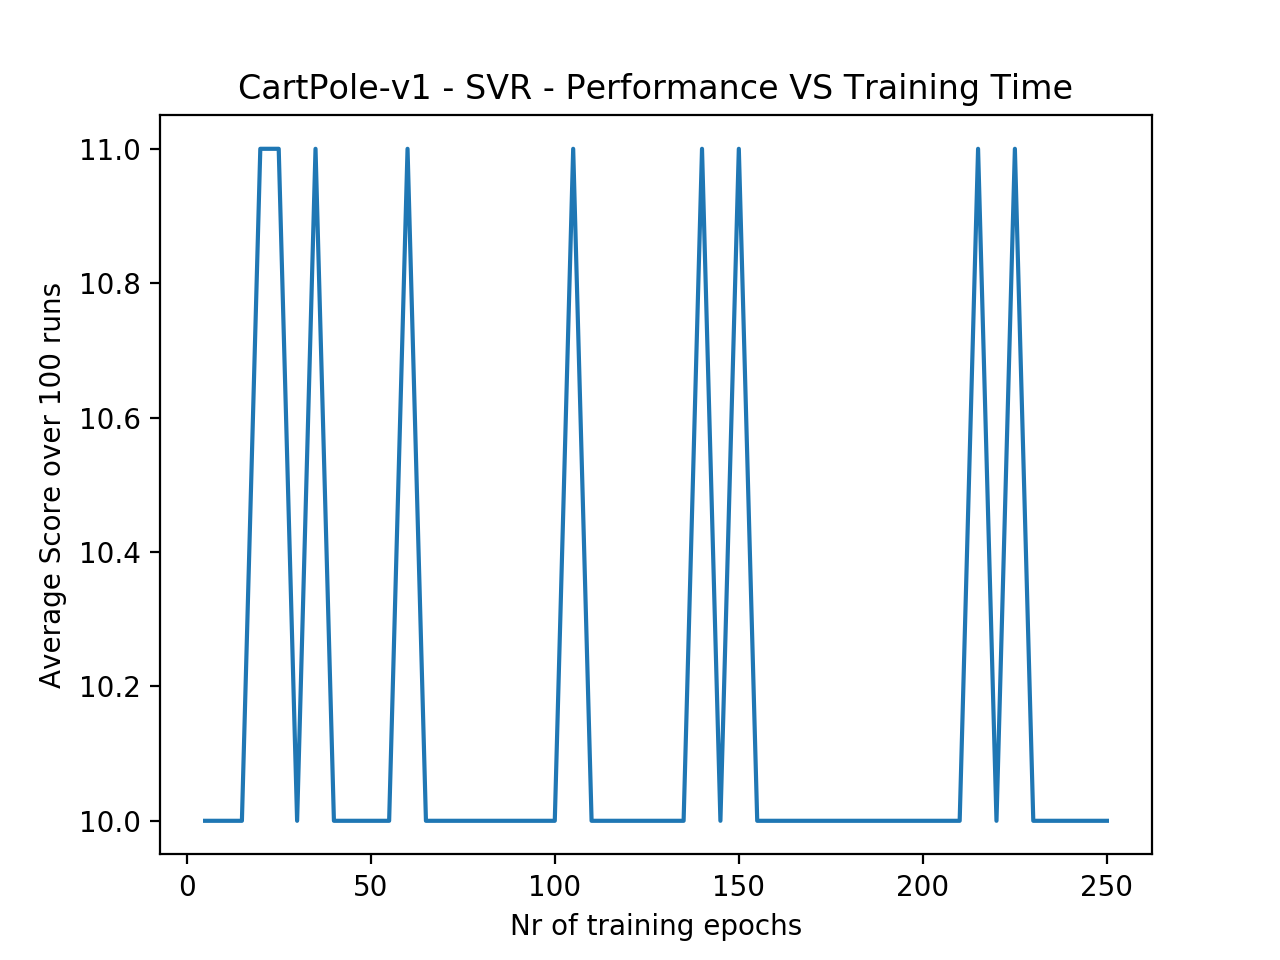

In [19]:
print(cwd)

fileName = cwd + '/data/CartPole-v1/SVR/1546384038578_finalResults.npy'
chartName = 'CartPole-v1 - SVR - Performance VS Training Time'

finalOutput = np.load(fileName)

best = -1
bestMax = -1
for i in range(10):
    data = finalOutput[i]
    if data[:,1].max() > bestMax:
        best = i
        bestMax = data[:,1].max()

plotData(fileName, chartName, best)